In [8]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import dask

load one year
(binned dataset as an example)

In [2]:
path_in =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/'


In [30]:
year = 2020

# read all nc in folder year/ within path_in as xarray dataset

ds = xr.open_mfdataset(path_in + str(year) + '/*.nc', combine='by_coords')
ds

<xarray.Dataset>
Dimensions:    (time: 245, latitude: 1248, longitude: 1056)
Coordinates:
  * time       (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-10-31
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(31, 1248, 1056), meta=np.ndarray>

In [31]:
# Coarsen the spatial resolution
ds_coarsened = ds.coarsen(latitude=4, longitude=4).mean()

# Group the data by 3-day chunks and compute the mean
ds_3day_mean = ds_coarsened.resample(time='5D').mean()

# Adjust the time coordinate to represent the first day of each 3-day interval
# ds_3day_mean['time'] = ds_3day_mean['time'].dt.floor('3D')

# Print the resulting dataset
ds_3day_mean

/tmp/ipykernel_9183/2324089053.py:2: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  ds_coarsened = ds.coarsen(latitude=4, longitude=4).mean()


<xarray.Dataset>
Dimensions:    (time: 49, latitude: 312, longitude: 264)
Coordinates:
  * latitude   (latitude) float64 84.98 84.94 84.9 84.85 ... 72.1 72.06 72.02
  * longitude  (longitude) float64 -4.917 -4.708 -4.5 ... 49.46 49.67 49.88
  * time       (time) datetime64[ns] 2020-03-01 2020-03-06 ... 2020-10-27
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(1, 312, 264), meta=np.ndarray>

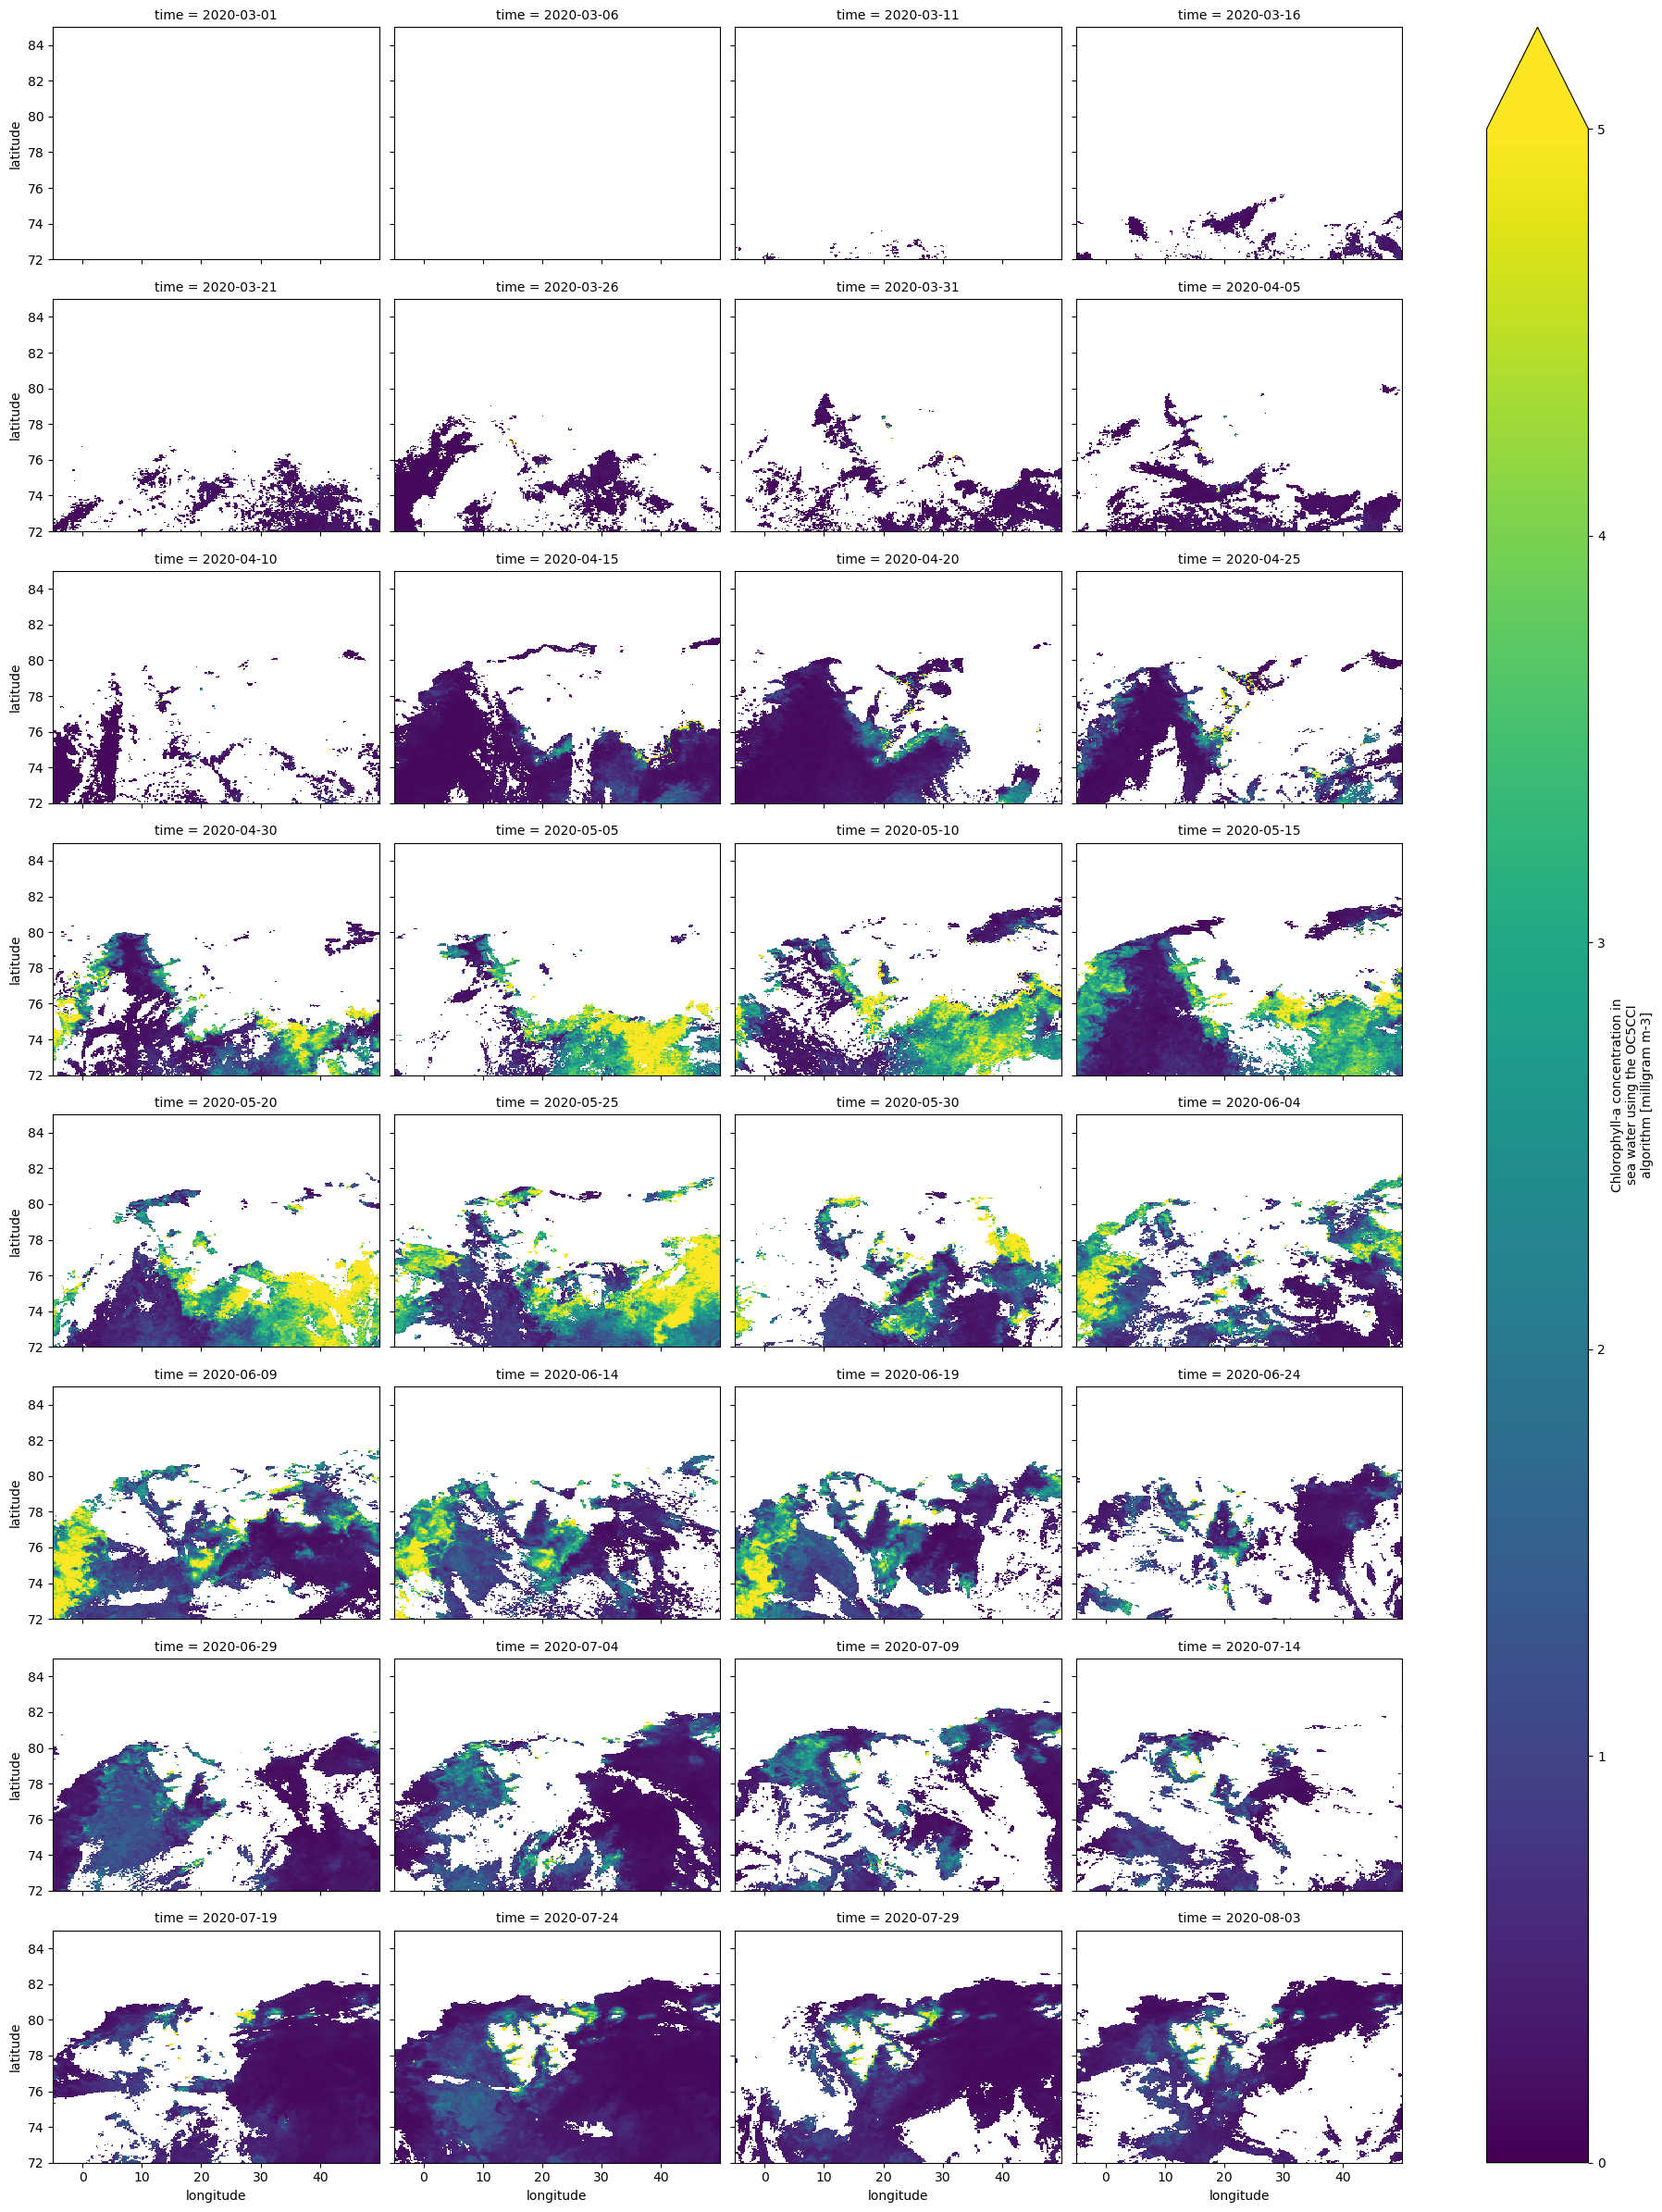

In [33]:
# plot the data as a panel with 4 columns (plot only the firs 16 time steps)
#ds_3day_mean.isel(time=slice(0,16)).plot(col='CHL', col_wrap=4)
ds_3day_mean.isel(time  =slice(0,32))['CHL'].plot(col='time', col_wrap=4, cmap='viridis', vmin=0, vmax=5, size=3, aspect=1.5)


In [34]:
# plot pt on a map
outpath = '/mnt/d/Dropbox/R_projects/SV_phenology/data/binned5days_4km/'
# if it does not exist, create the folder
os.makedirs(outpath, exist_ok=True)


In [39]:
tt = '1D'

xx =  16

# set consistent _FillValue and missing_value attributes for the 'CHL' variable
encoding = {'CHL': {'_FillValue': -999.0, 'missing_value': -999.0}}


# loop for each year within 1998 and 2022
for year in range(1998,2023):
    ds = xr.open_mfdataset(path_in + str(year) + '/*.nc', combine='by_coords')
    # Coarsen the spatial resolution
    ds_coarsened = ds.coarsen(latitude=xx, longitude=xx).mean()
    
    # Group the data by 3-day chunks and compute the mean
    ds_3day_mean = ds_coarsened.resample(time=tt).mean()
    
    ds_3day_mean.to_netcdf(outpath +  '/CHL_binned_{}k_{}ays_{}.nc'.format(xx, tt, year), encoding=encoding)

    

/tmp/ipykernel_9183/60368076.py:13: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  ds_coarsened = ds.coarsen(latitude=xx, longitude=xx).mean()
/tmp/ipykernel_9183/60368076.py:13: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunk

# media mobile

dato che non funziona provo a fare una media mobile come in :



In [40]:
# plot pt on a map
outpath = '/mnt/d/Dropbox/R_projects/SV_phenology/data/binned_smoothed/'
# if it does not exist, create the folder
os.makedirs(outpath, exist_ok=True)

In [50]:
tt = '3D'
mm = 9
xx =  16

# set consistent _FillValue and missing_value attributes for the 'CHL' variable
encoding = {'CHL': {'_FillValue': -999.0, 'missing_value': -999.0}}


# loop for each year within 1998 and 2022
for year in range(1998,2023):
    ds = xr.open_mfdataset(path_in + str(year) + '/*.nc', combine='by_coords')
    # Coarsen the spatial resolution
    ds_coarsened = ds.coarsen(latitude=xx, longitude=xx).mean()
    
    # Group the data by 3-day chunks and compute the mean
    ds_3day_mean = ds_coarsened.resample(time=tt).mean()
    
    ds_rolling= ds_3day_mean.rolling(time=mm, center=True, min_periods=1).mean()

    
    
    ds_3day_mean.to_netcdf(outpath +  '/CHL_binned_{}k_{}ays_{}rolling_{}.nc'.format(xx, tt, mm, year), encoding=encoding)

    

/tmp/ipykernel_9183/2947467463.py:13: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  ds_coarsened = ds.coarsen(latitude=xx, longitude=xx).mean()
/tmp/ipykernel_9183/2947467463.py:13: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_c

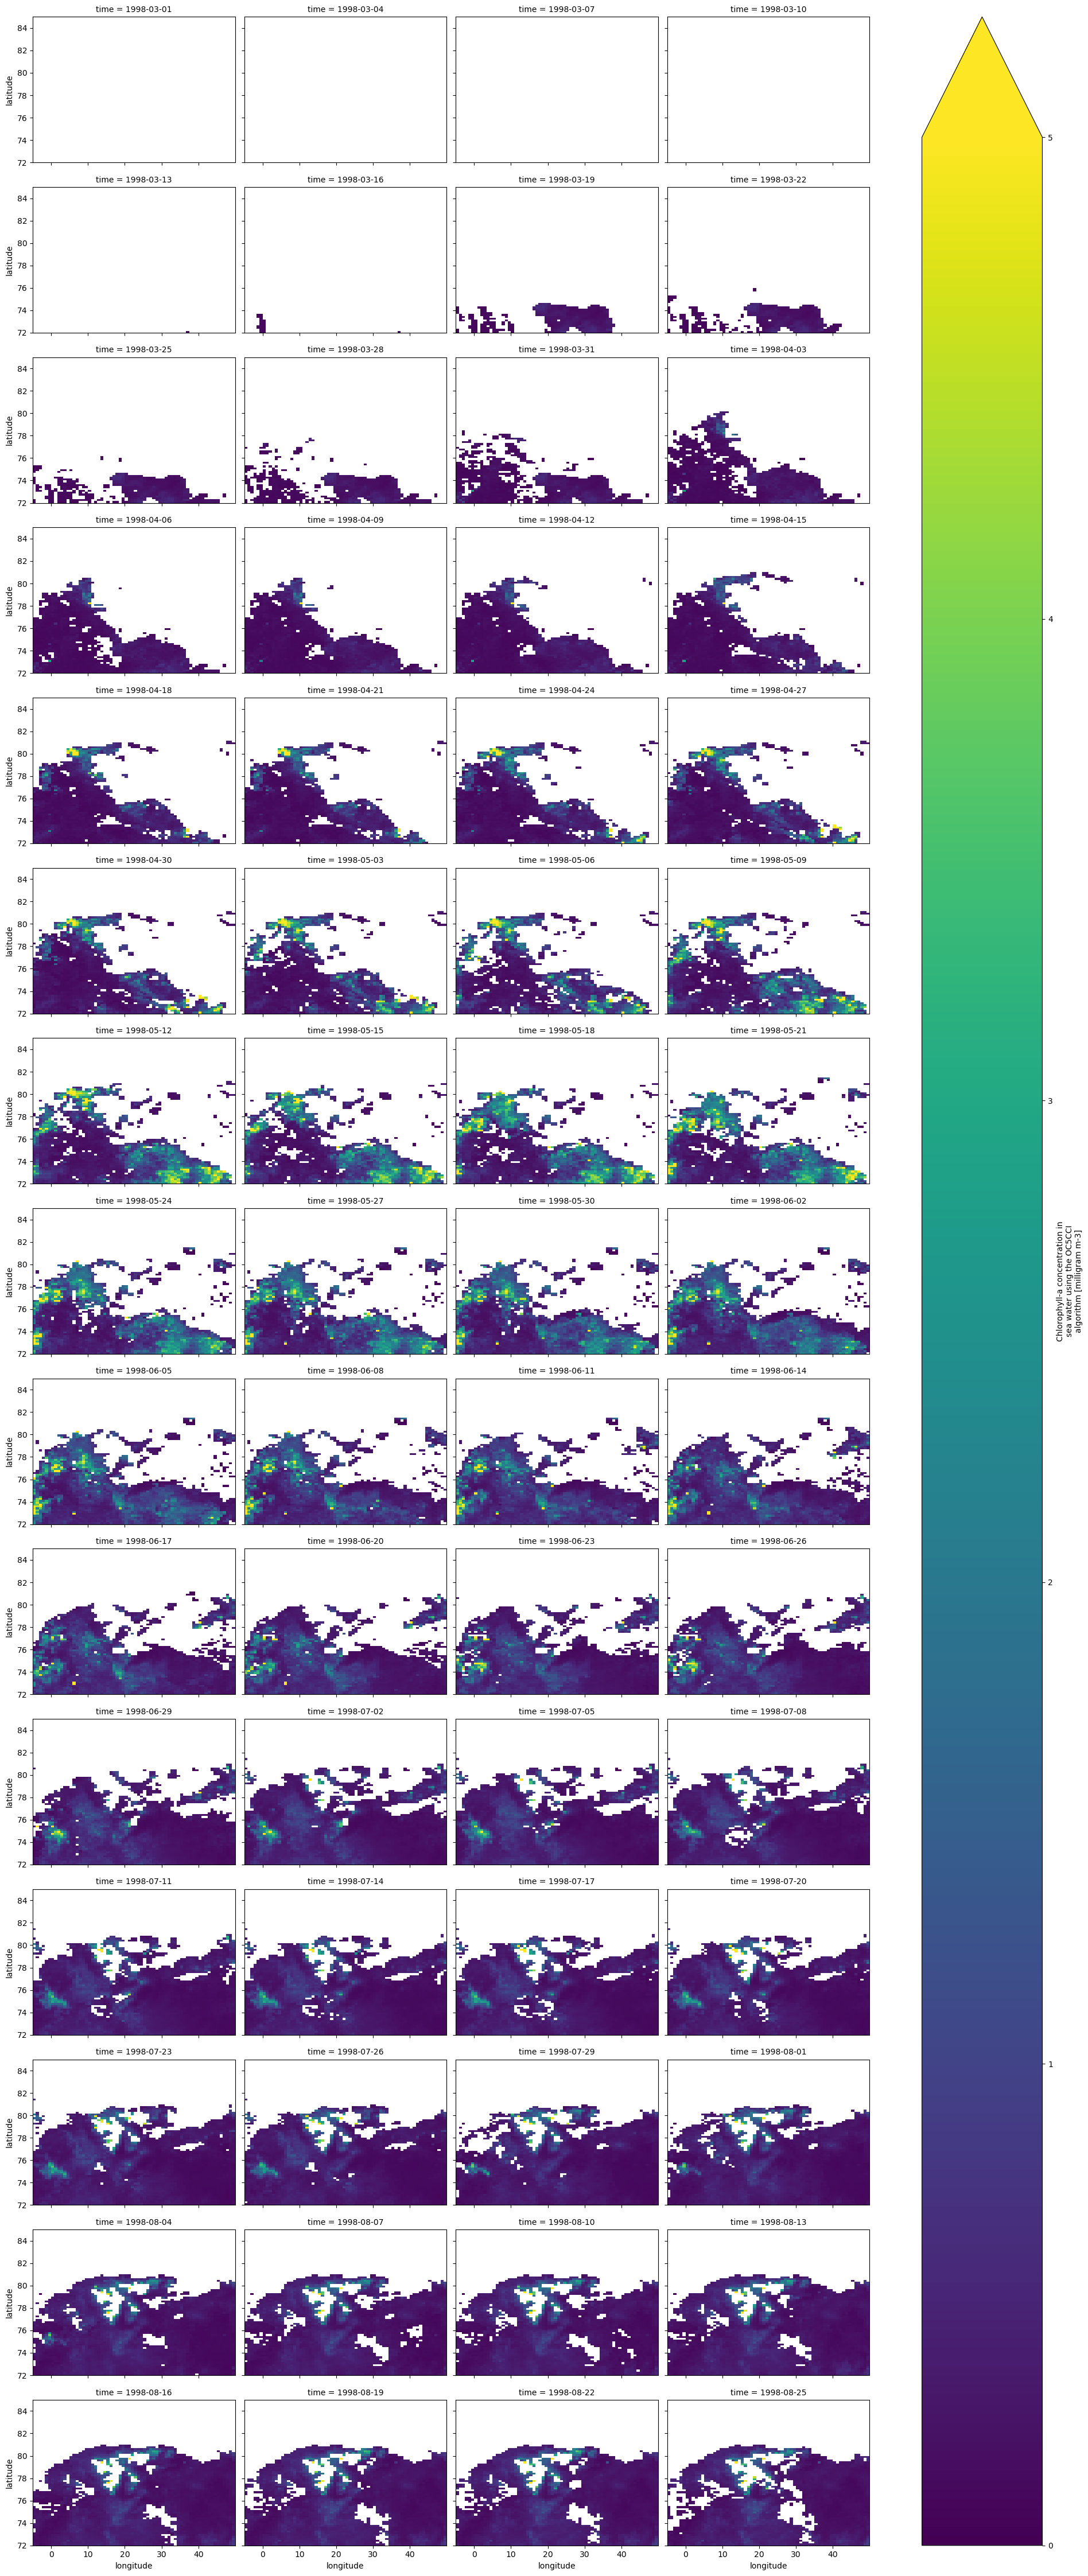

In [48]:
ds_rolling.isel(time  =slice(0,60))['CHL'].plot(col='time', col_wrap=4, cmap='viridis', vmin=0, vmax=5, size=3, aspect=1.5)


In [51]:
outpath

'/mnt/d/Dropbox/R_projects/SV_phenology/data/binned_smoothed/'

In [52]:
# reload all the nc in the folder and save a stacked tif
ds = xr.open_mfdataset(outpath + '*.nc', combine='by_coords')


# Select the data variable to export as a GeoTIFF
data_var = ds['CHL']

# Save the data variable as a GeoTIFF file
data_var.rio.to_raster('path/to/your/output.tif')
data_var.rio.to_raster(outpath + 'CHL_binned_{}k_{}ays_{}rolling.tif'.format(xx, tt, mm))

# save txt with the dates
da = ds['time']
da.to_dataframe().to_csv(outpath + 'CHL_binned_{}k_{}ays_{}rolling_dates.csv'.format(xx, tt, mm))


AttributeError: 'Dataset' object has no attribute 'to_tiff'